# Regularisation Basics

## Introduction

> Regularisation is any modiﬁcation made to a learning algorithm to reduce its generalisation error but not its training error.__

Conventionally, this involves constraining the model to impede its ability to perfectly fit the training set using techniques, such as
- stopping training early.
- adding penalty terms to the objective.
- changing the model's architecture to reduce its capacity.

## Reasons for Reqularisation

Given that this approach makes it difficult for our model to learn, one might question its value. 

- Regularisation reduces the model's capacity and forces it to learn relatively simple functions.
- Simple functions __generally__ have to learn only the most important relations.
- These relations most likely exert the most influence on the whole data, including the test set; thus, generalisation is improved at the cost of an increase in the training loss.

In this notebook, we will implement some regularisation techniques.

## Early Stopping

Early stopping is a technique that involves continuing model training until you notice an increase in the generalisation error (i.e. the model begins to overfit).

![](images/early_stopping.jpg)

### Parameters

Early stopping has a few parameters one can set:

- `patience`: the period to wait (usually in epochs) before terminating the training. Occasionally, the validation loss may decrease after a few epochs.
- `delta`: the degree of a decrease that constitutes an improvement over previous values. Minor improvements (say `0.000001`) may not be worth computer resources.

### Implementation

- Store __only__ the best model based on the validation loss (or other metrics). This approach improves efficiency in terms of disk usage and is most popular.
- Store __all__ the models that can be combined. Generally, this approach does not result in significant improvements over the best model; consequently, its use frequency in the community is considerably low.

## Introducing Norm Penalties



### Norms



To recap, the $L^p$ ("L-p") norm is given by

$$
||x||_p = \sqrt[^p]{\Sigma_i|x_i|^p}
$$



### Norm penalties

L1 and L2 are the types of regularisation that we will learn and implement next. 
They both involve adding a term, which is a norm penalty, to the cost function.

Furthermore, they are special cases of LP normalisation; other LPs (e.g. L4) are rarely used in practice.

![](images/norm_penalty_loss.jpg)

> The __lambda value__ describes the degree of regularisation; the higher the value, the higher the effect on the model and vice-versa.

#### Effect of norm penalties

> __Norm penalties increase with the model parameters.__

This, in turn, reduces the model's tendency to depend on large values for features as the model attempts to minimise the cost function.

- Relatively small and less 'spurious' weights increase the model's smoothness and simplicity. Further, the model is less likely to create functions that find non-existent patterns in data because doing so (by increasing the weights in magnitude) would increase the loss value.
- Regularising the objective function additionally reduces the variance in the final model.

## Lasso Regression (L1 Regularisation)

> Lasso regression = Linear regression + L1 regularisation 

Lasso regularisation penalises the objective by adding an L1 norm. This term is proportional to the sum of the **absolute** parameter values.

$$
||x||_1 = \Sigma_i|x_i|
$$

![](images/lasso_loss.jpg)

The L1 regularisation penalty's contribution to the gradient of the loss with respect to the model parameters is constant. 

__The L1 regularisation term is not differentiable__. It is only piecewise-differentiable on either side of 0. Fortunately, this is not a problem; as for `0`, we will have `0` penalty.

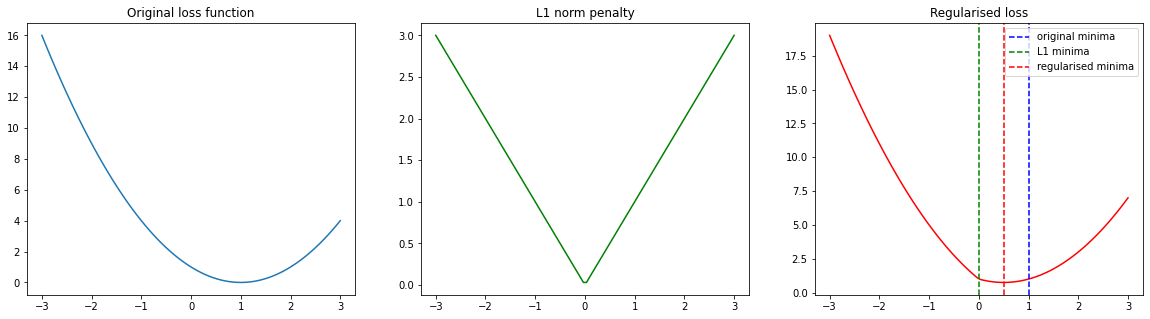

In [1]:
import numpy as np
import matplotlib.pyplot as plt

W = np.linspace(-3, 3, num=100)
L = (W-1)**2 # dummy loss function without weight-decay regularisation

_lambda = 1
l1 = _lambda * np.abs(W)

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax1.plot(W, L)
ax1.set_title('Original loss function')
ax2 = fig.add_subplot(132)
ax2.plot(W, l1, c='g')
ax2.set_title('L1 norm penalty')
ax3 = fig.add_subplot(133)
ax3.plot(W, L + l1, c='r')
ax3.set_title('Regularised loss')

ax3.axvline(1, c='b', linestyle='--', label="original minima")
ax3.axvline(0, c='g', linestyle='--', label="L1 minima")
ax3.axvline(0.5, c='r', linestyle='--', label="regularised minima")
ax3.legend()

plt.show()

Above, you can observe the minima of both the original loss function (left) and the regularisation term (middle). 

When both are applied onto each other, the found minima of the original function are moved towards the regularisation minimum (right).

## Ridge Regression (L2 Regularisation)

Ridge Regression = Linear regression + **Squared** L2 regularisation 

As mentioned, the L2 norm is utilised so commonly in ML that it is often written with the norm subscript omitted:

$$
||x||_2 = ||x|| = \sqrt{\sum_i x_i^2}
$$

For computational simplicity, we use the squared $L^2$ norm as the penalty.

![](images/ridge_loss.jpg)

> `sqrt` is not necessary since it can be disregarded as a multiplying constant (`weight_decay` parameter) and controlled by hand.

Ridge regression penalises the objective by adding an L2 norm. This term is proportional to the sum of the **square** parameter values. 

Notice that the L2 norm calculates the euclidian distance of a vector.

![title](images/NN1_regularization.JPG)

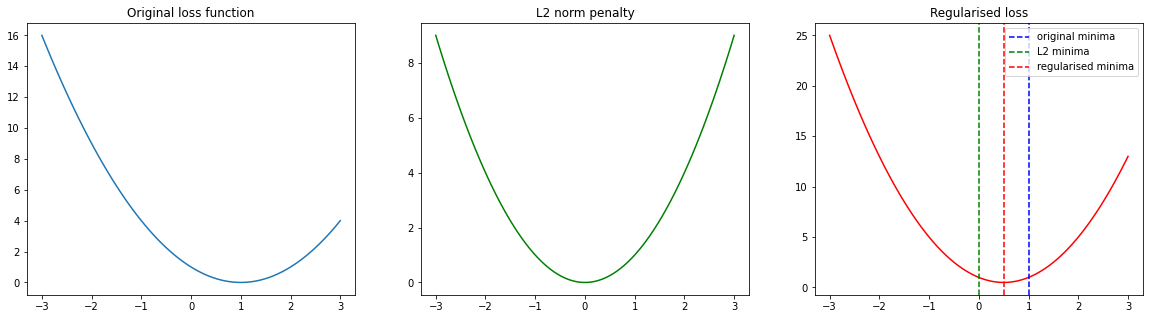

In [2]:
import numpy as np
import matplotlib.pyplot as plt

W = np.linspace(-3, 3, num=100)
L = (W-1)**2

_lambda = 1
l2 = _lambda * W**2

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax1.plot(W, L)
ax1.set_title('Original loss function')
ax2 = fig.add_subplot(132)
ax2.plot(W, l2, c='g')
ax2.set_title('L2 norm penalty')
ax3 = fig.add_subplot(133)
ax3.plot(W, L + l2, c='r')
ax3.set_title('Regularised loss')

ax3.axvline(1, c='b', linestyle='--', label="original minima")
ax3.axvline(0, c='g', linestyle='--', label="L2 minima")
ax3.axvline(0.5, c='r', linestyle='--', label="regularised minima")
ax3.legend()

plt.show()

## L1 vs L2 Intuition

Although both L1 and L2 regularise the model, they do so differently, and we should choose one (or both) depending on our goal.

Let us assume a few things for this thought experiment:

- Our model has __only__ two weights: $w_1$ and $w_2$.
- The __total value__ to be __distributed__ between these weights is `1` (thus, $w_1 + w_2 = 1$ always).
- The weights must be positive.
- Our linear regression attempts to approximate the following function:

$$
    y = x
$$

- The function employed for the approximation with the weights is (the coefficients are fixed):

$$
    y = 1xw_1 + 0.99999xw_2
$$

__Notice that either $w_1$ or $w_2$ can approximate the function properly.__

Next, we decide what $w_1$ and $w_2$ values to set to minimise the cost.

### L1

For L1, the value can be anything in the $[0, 1]$ range, as long as the sum equals `1`.

Therefore,

- $w_1=0$, $w_2=1$: the total is `1`, and '$|0| + |1| = 1$' is the penalty.
- $w_1=0.5$, $w_2=0.5$: the total is `1`, and '$|0.5| + |0.5| = 1$' is the penalty.
- $w_1=1$, $w_2=0$: the total is `1`, and '$|1| + |0| = 1$' is the penalty.

Regardless of the chosen value, the penalty will always be equal to `1`. __This leaves us with the cost itself__. Now, we input these values into the equation:

- $w_1=0$, $w_2=1$ - $y = 1x0 + 0.99999x1 = 0.99999x$ (this is slightly off from $y=x$; the loss will be $0.00001$).
- $w_1=0.5$, $w_2=0.5$ - $y = 1x0.5 + 0.99999x0.5 = 0.999995x$ (this is slightly off from $y=x$, and the loss will be $0.000005$; notice that it is two times smaller than the loss above).
- $w_1=1$, $w_2=0$ - $y = 1x1 + 0.99999x0 = x$ (the perfect loss is 0).

#### Deductions

- Irrespective of the magnitude, the penalty remains constant.
- The __L1 regularisation chooses the most important weight__ (here, $w_1$ achieves a perfect match; hence, $w_2$ is not needed).
- __It enforces sparsity__ (unrequired weights are __pruned__).
- It should be employed in cases where we wish to easily explain phenomena to models. Here, we can establish that only $w_1$ is important, and $w_2$ can be disregarded.

Occasionally, weights may not be zeroed out perfectly; in such cases, they should be removed if they are below a threshold.

### L2

We do the same for L2.

- $w_1=0$, $w_2=1$: the total is `1`, and '$|0| + |1| = 1$' is the penalty.
- $w_1=0.5$, $w_2=0.5$: the total __is not__ `1` as $0.5^2 + 0.5^2 = 0.25$.
- $w_1=1$, $w_2=0$: the total is `1`, and '$|1| + |0| = 1$' is the penalty.

In L2, values small in magnitude have less impact on the regularisation term. The cost of L2 remains constant; however, __this time,__ $w_1=1$ and $w_2=0$ will not be chosen because of the regularisation penalty. For our values respectively,

- penalty + loss - $1 + 0.00001 = 1.00001$ (total cost).
- __penalty + loss - $0.5 + 0.000005 = 0.500005$ (total cost).__
- penalty + loss - $1 + 0.0 = 1.0$ (total cost).

Here, the values that minimise the total cost are __evenly split__.

#### Deductions

- The __magnitude plays the most important role__ (low values correspond to improved results).
- __Responsibility split__ (if both weights do the same task (or almost the same), they should have non-zero magnitudes).
- __Smooth__ (the loss function is smoother, different from the previous case of sharp jumps with pruned values).
- It is unsuitable for explaining phenomena (possibly, the unrequired factors remain and influence the result).

> Note that L2 is the more popular variant (particularly in neural networks), and it is occasionally called __weight decay__.

## Changes in the Cost Function

Below is a visualisation of the changes in the loss landscape when the L2 regularisation term is added (notice the aforementioned smoothness characteristic).

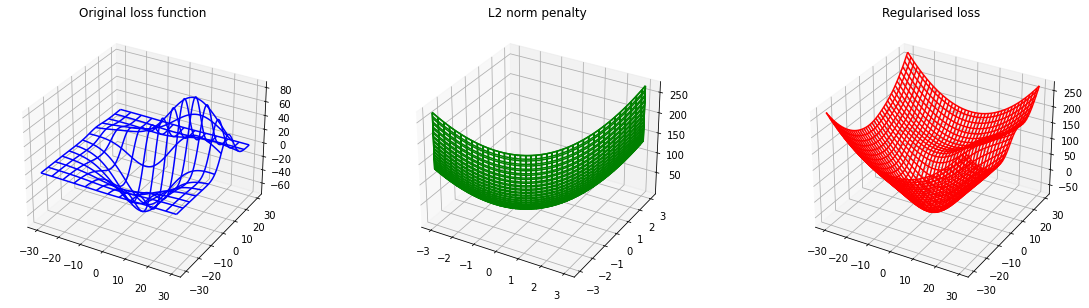

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

W = np.linspace(-3, 3, num=100)
L = (W-1)**2

_lambda = 15
x = np.linspace(-3, 3, 120)
y = np.linspace(-3, 3, 120)
xx, yy = np.meshgrid(x, y)
l2 = _lambda * (xx**2 + yy**2)

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131, projection='3d')
# ax1.plot(W, L)
ax1.set_title('Original loss function')
X, Y, Z = axes3d.get_test_data(0.05)
ax1.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color='b')

ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title('L2 norm penalty')

ax2.plot_wireframe(x, y, l2, color='g')

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_wireframe(X, Y, Z + l2, color='r')
ax3.set_title('Regularised loss')

plt.show()

- The graphs highlight how regularisation can reduce the variance by making the optima closer to the origin, preferable to other minima (even the global one).

- The red graph exhibits how regularisation guides the parameterisation toward the global optima and increases the smoothness of the function. Therefore, it does not matter when the optimisation begins. With regularisation, the probability of reaching a reasonable minimum is significantly increased.

## MSE and L2

Now that we know how `L2` works, let us combine the cost function and `L2` regularisation into a single formula:

$$
\begin{equation}
    L_{regularized} = L_{mse} + \lambda\sum_{i=1}^n w_i^2
\end{equation}
$$

$$
\begin{equation}
    \frac
        {
            \partial
            L_{regularized} 
        }
        {
            \partial
            w 
        }
        = 
    \frac
        {
            \partial
            L_{mse} 
        }
        {
            \partial
            w 
        }
    + 2\lambda\sum_{i=1}^n w_i
\end{equation}
$$


## MSE and L1

We do the same for L1:

$$
\begin{equation}
    L_{regularized} = L_{mse} + \lambda\sum_{i=1}^n |w_i|
\end{equation}
$$

$$
\begin{equation}
    \frac
        {
            \partial
            L_{regularized} 
        }
        {
            \partial
            w 
        }
        = 
    \frac
        {
            \partial
            L_{mse} 
        }
        {
            \partial
            w 
        }
    + \lambda\sum_{i=1}^n sign(w_i)
\end{equation}
$$

## Conclusion
At this point, you should have a fair understanding of

- regularisation and its associated techniques.
- how to implement early stopping, asso regression and Ridge regression.
